# Setup môi trường

In [1]:
import os
print(os.getcwd())
os.chdir("../../..")
print(os.getcwd())

/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase2_280824/notebooks/train_module2/with_aug_data
/home/haipn/Clone/Research_ThyroidFNA_ClassAI/phase2_280824


# Setup data

In [2]:
import pandas as pd

# Đọc dữ liệu từ CSV
data_dir = './data/processed/'
# train_df = pd.read_csv(data_dir + 'train_features.csv').drop(columns=['image_path'])
valid_df = pd.read_csv(data_dir + 'valid_features.csv').drop(columns=['image_path'])
test_df = pd.read_csv(data_dir + 'test_features.csv').drop(columns=['image_path'])

data_dir = './data/augmented/'
train_df_aug = pd.read_csv(data_dir + 'train_augmented_features.csv')

# Xem cấu trúc của DataFrame
# print('Train DataFrame:')
# print(train_df.head(3))
print('Valid DataFrame:')
print(valid_df.head(3))
print('Test DataFrame:')
print(test_df.head(3))
print('Train Augmented DataFrame:')
print(train_df_aug.head(3))

Valid DataFrame:
   label     dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
0      2 -4.308372 -0.436520  3.545043 -2.595636 -1.076509  3.019734   
1      2 -2.273990 -2.976918  4.630661 -5.481691  1.987185  3.077199   
2      2 -4.070328 -3.232069  6.819434 -3.002290 -1.391492  3.774137   

      dim_6     dim_7     dim_8  ...    dim_29    dim_30    dim_31    dim_32  \
0 -3.748788 -0.974676  4.619431  ...  4.596820 -4.209521 -0.469024  4.025341   
1 -4.994466  1.433963  2.813911  ...  3.553807 -3.890979 -0.693126  4.631985   
2 -2.197132 -2.203136  3.730880  ...  2.323358 -3.455380 -3.436366  6.039357   

     dim_33    dim_34    dim_35    dim_36    dim_37    dim_38  
0 -3.474844 -1.487661  5.017033 -1.916778 -0.383969  2.663312  
1 -2.152809 -0.549343  3.090957 -1.015712 -1.852066  2.541131  
2 -3.923026 -2.357094  5.158929 -4.472951 -3.406128  6.673154  

[3 rows x 40 columns]
Test DataFrame:
   label     dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
0     

In [3]:
import torch
# Tính toán số lượng mẫu của mỗi lớp
class_counts = train_df_aug['label'].value_counts()
total_samples = len(train_df_aug)
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# In ra thông tin trọng số
print("Class Weights (inverse frequency):")
print(class_weights)

# Chuyển đổi trọng số nhãn thành tensor
class_weights_tensor = torch.tensor(sorted(list(class_weights.values()), reverse=True), dtype=torch.float)
print(class_weights_tensor)

Class Weights (inverse frequency):
{2: 0.7693833943833944, 1: 1.111331569664903, 0: 1.2493184634448575}
tensor([1.2493, 1.1113, 0.7694])


In [4]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


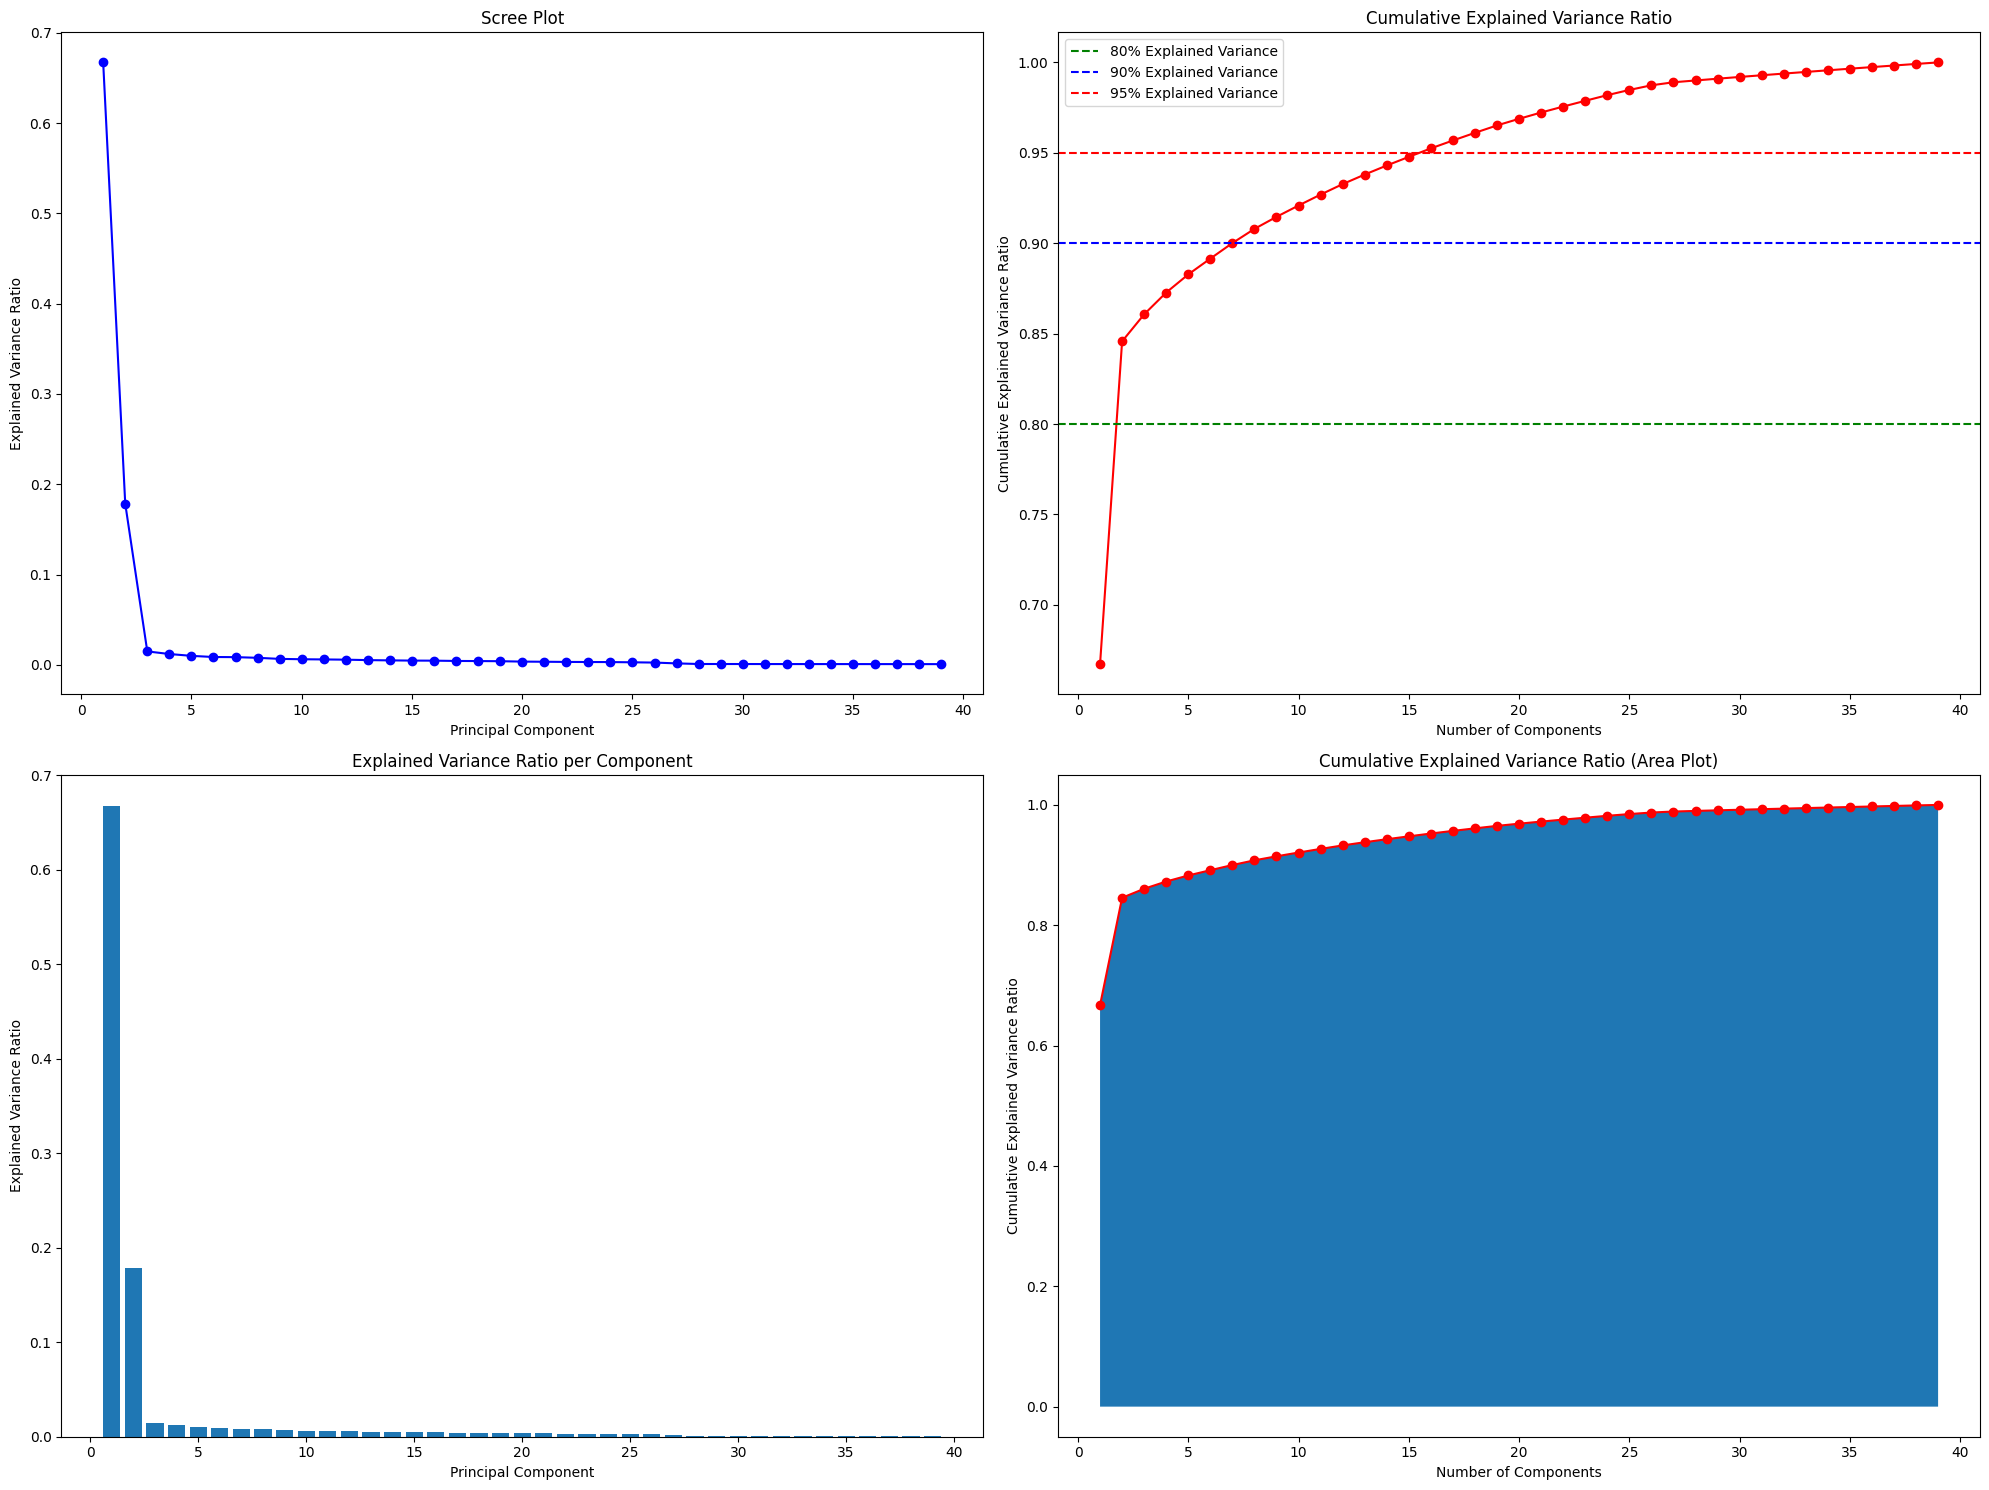

Total number of components: 39

Explained variance ratio for each component:
PC1: 0.6672
PC2: 0.1785
PC3: 0.0149
PC4: 0.0121
PC5: 0.0100
PC6: 0.0087
PC7: 0.0086
PC8: 0.0079
PC9: 0.0067
PC10: 0.0063
PC11: 0.0060
PC12: 0.0058
PC13: 0.0053
PC14: 0.0050
PC15: 0.0048
PC16: 0.0047
PC17: 0.0044
PC18: 0.0042
PC19: 0.0041
PC20: 0.0037
PC21: 0.0035
PC22: 0.0033
PC23: 0.0032
PC24: 0.0031
PC25: 0.0029
PC26: 0.0026
PC27: 0.0017
PC28: 0.0010
PC29: 0.0010
PC30: 0.0010
PC31: 0.0009
PC32: 0.0009
PC33: 0.0009
PC34: 0.0009
PC35: 0.0009
PC36: 0.0009
PC37: 0.0009
PC38: 0.0009
PC39: 0.0008

Number of components needed to explain:
70.0% of variance: 2
80.0% of variance: 2
90.0% of variance: 7
95.0% of variance: 16
99.0% of variance: 28

Optimal number of components (elbow method): 3

Shape of the transformed data: (25205, 3)


In [5]:
# Flatten the data
X_train_flat = train_df_aug.iloc[:, 1:].values
X_valid_flat = valid_df.iloc[:, 1:].values
X_test_flat = test_df.iloc[:, 1:].values

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train_flat)
# skip standardization as the data is already standardized with same range
X_scaled = X_train_flat

# Step 2: Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Calculate explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Step 4: Create visualizations
plt.figure(figsize=(20, 15))

# Plot 1: Scree plot
plt.subplot(2, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot 2: Cumulative explained variance plot
plt.subplot(2, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# Add lines for 80%, 90%, and 95% explained variance
plt.axhline(y=0.8, color='g', linestyle='--', label='80% Explained Variance')
plt.axhline(y=0.9, color='b', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()

# Plot 3: Explained variance for each component (bar plot)
plt.subplot(2, 2, 3)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance Ratio per Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Plot 4: Cumulative explained variance (area plot)
plt.subplot(2, 2, 4)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.fill_between(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.title('Cumulative Explained Variance Ratio (Area Plot)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

# Step 5: Print additional information
print("Total number of components:", len(explained_variance_ratio))
print("\nExplained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"PC{i}: {ratio:.4f}")

print("\nNumber of components needed to explain:")
for threshold in [0.7, 0.8, 0.9, 0.95, 0.99]:
    n_components = np.where(cumulative_variance_ratio >= threshold)[0][0] + 1
    print(f"{threshold*100}% of variance: {n_components}")

# Step 6: Determine optimal number of components (elbow method)
from kneed import KneeLocator
n_components_range = range(1, len(explained_variance_ratio) + 1)
kneedle = KneeLocator(n_components_range, explained_variance_ratio, curve='convex', direction='decreasing')
print(f"\nOptimal number of components (elbow method): {kneedle.elbow}")

# Step 7: Transform the data using the optimal number of components
optimal_n_components = kneedle.elbow
pca_optimal = PCA(n_components=optimal_n_components)
X_pca = pca_optimal.fit_transform(X_scaled)

print(f"\nShape of the transformed data: {X_pca.shape}")

# Với số thành phần component là 3

In [6]:
num_components_with_elbow_method = 3

In [8]:
from torch.utils.data import DataLoader, TensorDataset

# Apply PCA
n_components = num_components_with_elbow_method
pca = PCA(n_components=n_components)
pca.fit(X_train_flat)

# Transform the data
X_train_pca = pca.transform(X_train_flat)
X_valid_pca = pca.transform(X_valid_flat)
X_test_pca = pca.transform(X_test_flat)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train_pca, dtype=torch.float32)
y_train = torch.tensor(train_df_aug['label'].values, dtype=torch.long)
X_valid = torch.tensor(X_valid_pca, dtype=torch.float32)
y_valid = torch.tensor(valid_df['label'].values, dtype=torch.long)
X_test = torch.tensor(X_test_pca, dtype=torch.float32)
y_test = torch.tensor(test_df['label'].values, dtype=torch.long)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=120, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=120, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=120, shuffle=False)

torch.Size([25205, 3]) torch.Size([25205])
torch.Size([270, 3]) torch.Size([270])
torch.Size([273, 3]) torch.Size([273])


## Huấn luyện mô hình

In [13]:
import torch
from src.models.module2.ann import ANN

model = ANN(input_dim=num_components_with_elbow_method, output_dim=3, num_hidden=9, num_layers=3, dropout=0.5)
num_params = sum(p.numel() for p in model.parameters())
print(num_params)

246


In [14]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [15]:
# set seed
torch.manual_seed(97)

model.to('cuda')
criterion.to('cuda')

num_epochs = 100
best_valid_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Đánh giá mô hình trên tập validation
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)

    valid_loss /= len(valid_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss:.4f}, Validation Loss: {valid_loss:.4f}")

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_PCA_ANN_withAug.pth')

Epoch 1/100, Train Loss: 1.1687, Validation Loss: 1.1044
Epoch 2/100, Train Loss: 1.1128, Validation Loss: 1.0524
Epoch 3/100, Train Loss: 1.0825, Validation Loss: 1.0480
Epoch 4/100, Train Loss: 1.0627, Validation Loss: 1.0444
Epoch 5/100, Train Loss: 1.0420, Validation Loss: 1.0391
Epoch 6/100, Train Loss: 1.0221, Validation Loss: 1.0269
Epoch 7/100, Train Loss: 1.0003, Validation Loss: 1.0083
Epoch 8/100, Train Loss: 0.9727, Validation Loss: 0.9819
Epoch 9/100, Train Loss: 0.9437, Validation Loss: 0.9520
Epoch 10/100, Train Loss: 0.9116, Validation Loss: 0.9174
Epoch 11/100, Train Loss: 0.8765, Validation Loss: 0.8784
Epoch 12/100, Train Loss: 0.8397, Validation Loss: 0.8375
Epoch 13/100, Train Loss: 0.8070, Validation Loss: 0.7987
Epoch 14/100, Train Loss: 0.7651, Validation Loss: 0.7575
Epoch 15/100, Train Loss: 0.7194, Validation Loss: 0.7173
Epoch 16/100, Train Loss: 0.6834, Validation Loss: 0.6822
Epoch 17/100, Train Loss: 0.6534, Validation Loss: 0.6497
Epoch 18/100, Train Los

## Kiểm thử

### Trên tập valid


AUC Scores for each class:
0.9653529590136949

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.74      0.91      0.82        81
           2       0.94      0.77      0.85       117

    accuracy                           0.87       270
   macro avg       0.88      0.89      0.88       270
weighted avg       0.88      0.87      0.87       270



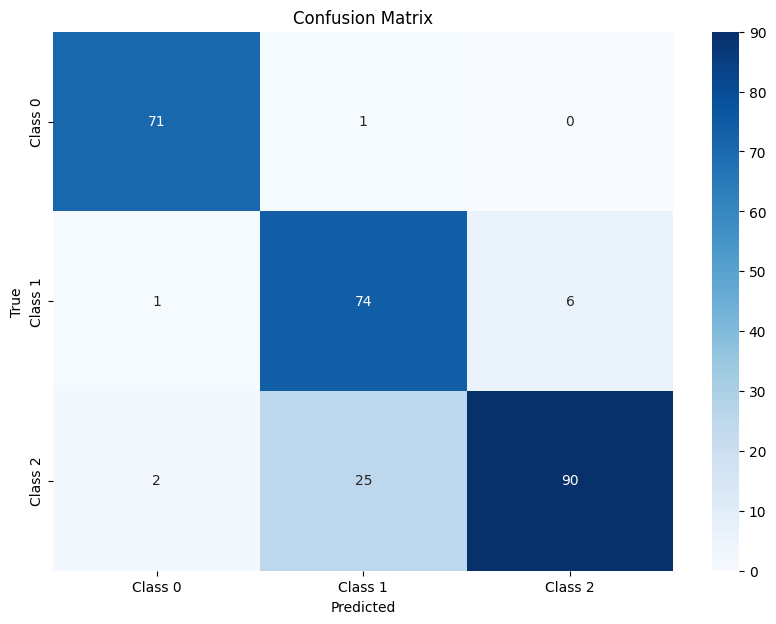

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model_PCA_ANN_withAug.pth', weights_only=True, map_location='cpu'))

# Dự đoán trên tập validation
model.eval()
y_true = []
y_pred = []
y_pred_prob = []  # Lưu xác suất dự đoán cho AUC
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        prob = F.softmax(outputs, dim=1)  # Chuyển đổi đầu ra thành xác suất
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(prob.cpu().numpy())  # Lưu xác suất dự đoán

# Chuyển đổi danh sách thành mảng NumPy
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Tính toán confusion matrix và classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán AUC cho từng lớp
try:
    auc_scores = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print("\nAUC Scores for each class:")
    print(auc_scores)
except ValueError as e:
    print(f"ValueError: {e}")

print("\nClassification Report:")
print(class_report)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Trên tập test


AUC Scores for each class:
0.9633574733772559

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       0.68      0.91      0.78        82
           2       0.93      0.75      0.83       118

    accuracy                           0.84       273
   macro avg       0.87      0.86      0.85       273
weighted avg       0.87      0.84      0.85       273



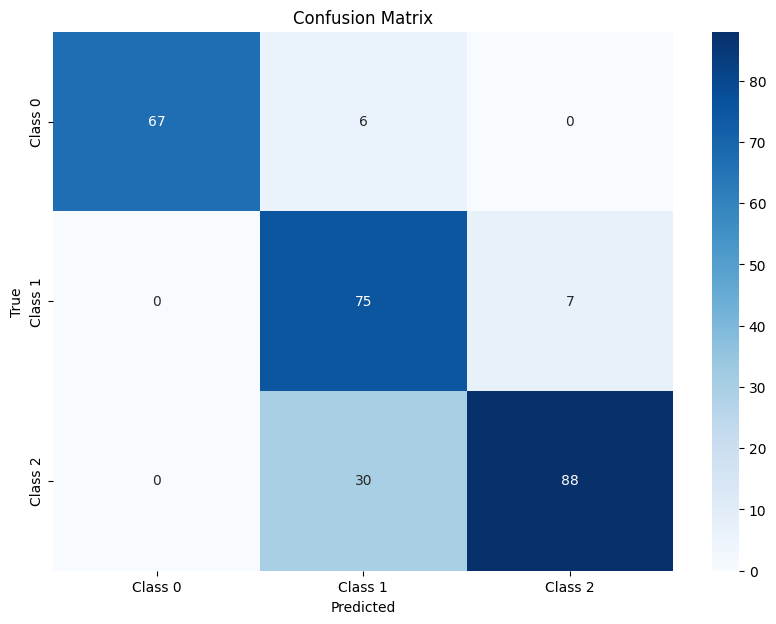

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model_PCA_ANN_withAug.pth', weights_only=True, map_location='cpu'))

# Dự đoán trên tập validation
model.eval()
y_true = []
y_pred = []
y_pred_prob = []  # Lưu xác suất dự đoán cho AUC
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        prob = F.softmax(outputs, dim=1)  # Chuyển đổi đầu ra thành xác suất
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(prob.cpu().numpy())  # Lưu xác suất dự đoán

# Chuyển đổi danh sách thành mảng NumPy
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Tính toán confusion matrix và classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán AUC cho từng lớp
try:
    auc_scores = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print("\nAUC Scores for each class:")
    print(auc_scores)
except ValueError as e:
    print(f"ValueError: {e}")

print("\nClassification Report:")
print(class_report)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Với số thành phần component là 7

In [18]:
num_components_with_elbow_method = 7

In [19]:
from torch.utils.data import DataLoader, TensorDataset

# Apply PCA
n_components = num_components_with_elbow_method
pca = PCA(n_components=n_components)
pca.fit(X_train_flat)

# Transform the data
X_train_pca = pca.transform(X_train_flat)
X_valid_pca = pca.transform(X_valid_flat)
X_test_pca = pca.transform(X_test_flat)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train_pca, dtype=torch.float32)
y_train = torch.tensor(train_df_aug['label'].values, dtype=torch.long)
X_valid = torch.tensor(X_valid_pca, dtype=torch.float32)
y_valid = torch.tensor(valid_df['label'].values, dtype=torch.long)
X_test = torch.tensor(X_test_pca, dtype=torch.float32)
y_test = torch.tensor(test_df['label'].values, dtype=torch.long)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=120, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=120, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=120, shuffle=False)

torch.Size([25205, 7]) torch.Size([25205])
torch.Size([270, 7]) torch.Size([270])
torch.Size([273, 7]) torch.Size([273])


## Huấn luyện mô hình

In [20]:
import torch
from src.models.module2.ann import ANN

model = ANN(input_dim=num_components_with_elbow_method, output_dim=3, num_hidden=9, num_layers=3, dropout=0.5)
num_params = sum(p.numel() for p in model.parameters())
print(num_params)

282


In [21]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [22]:
# set seed
torch.manual_seed(97)

model.to('cuda')
criterion.to('cuda')

num_epochs = 100
best_valid_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Đánh giá mô hình trên tập validation
    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)

    valid_loss /= len(valid_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss:.4f}, Validation Loss: {valid_loss:.4f}")

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model_PCA7_ANN_withAug.pth')

Epoch 1/100, Train Loss: 0.7456, Validation Loss: 1.1347
Epoch 2/100, Train Loss: 0.7664, Validation Loss: 1.0409
Epoch 3/100, Train Loss: 0.7802, Validation Loss: 0.9633
Epoch 4/100, Train Loss: 0.7901, Validation Loss: 0.8926
Epoch 5/100, Train Loss: 0.7956, Validation Loss: 0.8222
Epoch 6/100, Train Loss: 0.8023, Validation Loss: 0.7493
Epoch 7/100, Train Loss: 0.8120, Validation Loss: 0.6807
Epoch 8/100, Train Loss: 0.8232, Validation Loss: 0.6224
Epoch 9/100, Train Loss: 0.8310, Validation Loss: 0.5796
Epoch 10/100, Train Loss: 0.8335, Validation Loss: 0.5494
Epoch 11/100, Train Loss: 0.8383, Validation Loss: 0.5256
Epoch 12/100, Train Loss: 0.8452, Validation Loss: 0.5081
Epoch 13/100, Train Loss: 0.8350, Validation Loss: 0.4983
Epoch 14/100, Train Loss: 0.8334, Validation Loss: 0.4874
Epoch 15/100, Train Loss: 0.8226, Validation Loss: 0.4795
Epoch 16/100, Train Loss: 0.8116, Validation Loss: 0.4721
Epoch 17/100, Train Loss: 0.7995, Validation Loss: 0.4657
Epoch 18/100, Train Los

## Kiểm thử

### Trên tập valid


AUC Scores for each class:
0.9624531387724319

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       0.75      0.94      0.83        81
           2       0.96      0.77      0.85       117

    accuracy                           0.88       270
   macro avg       0.89      0.90      0.89       270
weighted avg       0.90      0.88      0.88       270



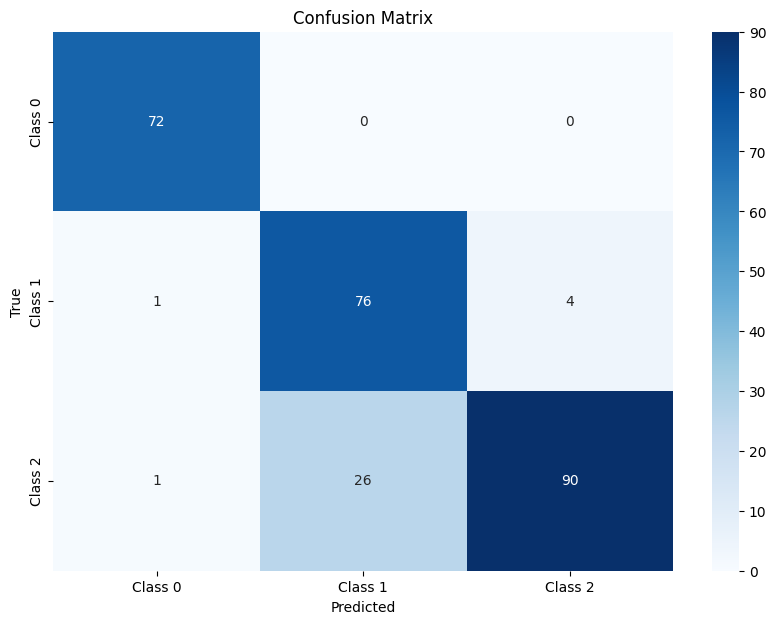

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model_PCA7_ANN_withAug.pth', weights_only=True, map_location='cpu'))

# Dự đoán trên tập validation
model.eval()
y_true = []
y_pred = []
y_pred_prob = []  # Lưu xác suất dự đoán cho AUC
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        prob = F.softmax(outputs, dim=1)  # Chuyển đổi đầu ra thành xác suất
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(prob.cpu().numpy())  # Lưu xác suất dự đoán

# Chuyển đổi danh sách thành mảng NumPy
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Tính toán confusion matrix và classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán AUC cho từng lớp
try:
    auc_scores = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print("\nAUC Scores for each class:")
    print(auc_scores)
except ValueError as e:
    print(f"ValueError: {e}")

print("\nClassification Report:")
print(class_report)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Trên tập test


AUC Scores for each class:
0.9590341933998049

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        73
           1       0.73      0.91      0.81        82
           2       0.93      0.81      0.86       118

    accuracy                           0.87       273
   macro avg       0.89      0.88      0.88       273
weighted avg       0.89      0.87      0.87       273



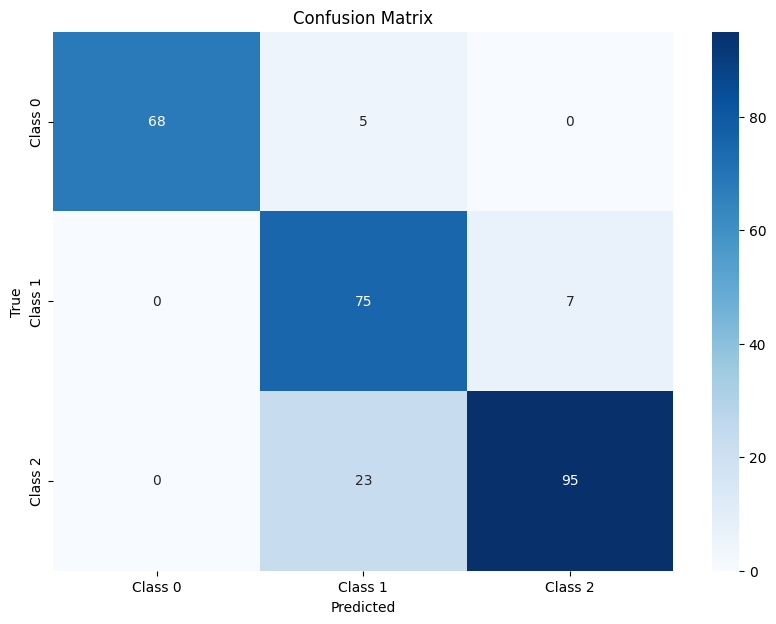

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F

# Load mô hình tốt nhất
model.load_state_dict(torch.load('best_model_PCA7_ANN_withAug.pth', weights_only=True, map_location='cpu'))

# Dự đoán trên tập validation
model.eval()
y_true = []
y_pred = []
y_pred_prob = []  # Lưu xác suất dự đoán cho AUC
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = model(inputs)
        prob = F.softmax(outputs, dim=1)  # Chuyển đổi đầu ra thành xác suất
        _, predicted = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
        y_pred_prob.extend(prob.cpu().numpy())  # Lưu xác suất dự đoán

# Chuyển đổi danh sách thành mảng NumPy
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)

# Tính toán confusion matrix và classification report
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Tính toán AUC cho từng lớp
try:
    auc_scores = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    print("\nAUC Scores for each class:")
    print(auc_scores)
except ValueError as e:
    print(f"ValueError: {e}")

print("\nClassification Report:")
print(class_report)

# Vẽ confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()